In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
plt.style.use('seaborn-darkgrid')

In [2]:
national_demand = pd.read_csv('../data/demand_lower_48')

In [3]:
national_demand.head()

,Time,Megawatthours
0,03/21/21 20:00 -0400,390453
1,03/21/21 19:00 -0400,379932
2,03/21/21 18:00 -0400,371950
3,03/21/21 17:00 -0400,365016
4,03/21/21 16:00 -0400,363364


In [4]:
def drop_utc(string):
    return string[:-6]

In [5]:
national_demand['Time'] = national_demand['Time'].apply(lambda x: drop_utc(x))

In [6]:
national_demand['Time'] = pd.to_datetime(national_demand['Time'], errors='coerce')

In [7]:
type(national_demand.loc[0, 'Time'])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
national_demand['Time'].dtype

dtype('<M8[ns]')

In [9]:
national_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50180 entries, 0 to 50179
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           50180 non-null  datetime64[ns]
 1   Megawatthours  50180 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 784.2 KB


In [10]:
national_demand.head()

,Time,Megawatthours
0,2021-03-21 20:00:00,390453
1,2021-03-21 19:00:00,379932
2,2021-03-21 18:00:00,371950
3,2021-03-21 17:00:00,365016
4,2021-03-21 16:00:00,363364


In [11]:
national_demand = national_demand.loc[::-1]

In [12]:
national_demand.reset_index(inplace=True, drop=True)
national_demand.drop(index=0, inplace=True)
national_demand.reset_index(inplace=True, drop=True)

In [13]:
national_demand.head()

,Time,Megawatthours
0,2015-07-01 02:00:00,335153
1,2015-07-01 03:00:00,333837
2,2015-07-01 04:00:00,398386
3,2015-07-01 05:00:00,388954
4,2015-07-01 06:00:00,392487


In [14]:
national_demand['Year'] = national_demand['Time'].dt.year
national_demand['Month'] = national_demand['Time'].dt.month
national_demand['Hour'] = national_demand['Time'].dt.hour
national_demand['Day_of_week'] = national_demand['Time'].dt.dayofweek
national_demand['Day_of_month'] = national_demand['Time'].dt.day
national_demand['Day_of_year'] = national_demand['Time'].dt.dayofyear
national_demand['Week_of_year'] = national_demand['Time'].dt.isocalendar().week

In [15]:
national_demand.set_index('Time', inplace=True, drop=True)

In [16]:
national_demand.head(10)

,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year,Week_of_year
Time,,,,,,,,
2015-07-01 02:00:00,335153,2015,7,2,2,1,182,27
2015-07-01 03:00:00,333837,2015,7,3,2,1,182,27
2015-07-01 04:00:00,398386,2015,7,4,2,1,182,27
2015-07-01 05:00:00,388954,2015,7,5,2,1,182,27
2015-07-01 06:00:00,392487,2015,7,6,2,1,182,27
2015-07-01 07:00:00,404647,2015,7,7,2,1,182,27
2015-07-01 08:00:00,422227,2015,7,8,2,1,182,27
2015-07-01 09:00:00,442131,2015,7,9,2,1,182,27
2015-07-01 10:00:00,464371,2015,7,10,2,1,182,27


In [17]:
mwh = pd.Series(national_demand['Megawatthours'])
mwh

Time
2015-07-01 02:00:00    335153
2015-07-01 03:00:00    333837
2015-07-01 04:00:00    398386
2015-07-01 05:00:00    388954
2015-07-01 06:00:00    392487
                        ...  
2021-03-21 16:00:00    363364
2021-03-21 17:00:00    365016
2021-03-21 18:00:00    371950
2021-03-21 19:00:00    379932
2021-03-21 20:00:00    390453
Name: Megawatthours, Length: 50179, dtype: int64

In [18]:
annual_means = mwh.resample('Y').mean()
annual_means

Time
2015-12-31    455330.787316
2016-12-31    455349.533698
2017-12-31    451745.615183
2018-12-31    464325.238927
2019-12-31    458646.549201
2020-12-31    446613.123634
2021-12-31    451955.987996
Freq: A-DEC, Name: Megawatthours, dtype: float64

In [19]:
quarterly_means = mwh.resample('Q-JUL').mean()
quarterly_means

Time
2015-07-31    519934.567385
2015-10-31    458345.504076
2016-01-31    433755.192395
2016-04-30    413196.860120
2016-07-31    487912.513587
2016-10-31    478010.956975
2017-01-31    437579.799457
2017-04-30    414424.509133
2017-07-31    484401.786685
2017-10-31    464383.644928
2018-01-31    455630.094613
2018-04-30    422797.777518
2018-07-31    493281.544384
2018-10-31    482370.518116
2019-01-31    450001.437755
2019-04-30    423595.743326
2019-07-31    482864.389946
2019-10-31    479655.325181
2020-01-31    439843.094160
2020-04-30    409454.071329
2020-07-31    474645.225543
2020-10-31    464897.866395
2021-01-31    440354.046175
2021-04-30    447511.206485
Freq: Q-JUL, Name: Megawatthours, dtype: float64

In [20]:
def plot_timeseries(ax, series, title=None, label=None):
    ax.plot(series, label=label)
    ax.set_title(title)

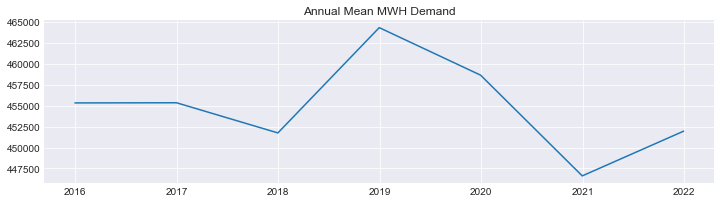

In [21]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, annual_means, 'Annual Mean MWH Demand')
plt.show()

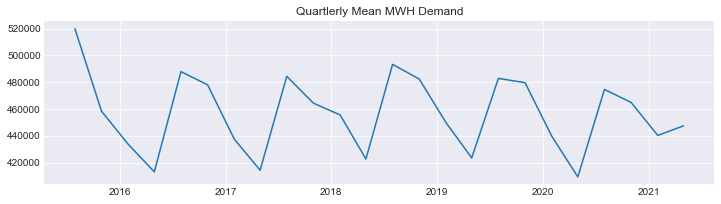

In [22]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, quarterly_means, 'Quartlerly Mean MWH Demand')
fig.savefig('../images/eda/quarterly_means.png', dpi=400)
plt.show()

In [23]:
monthly_means = mwh.resample('M').mean()

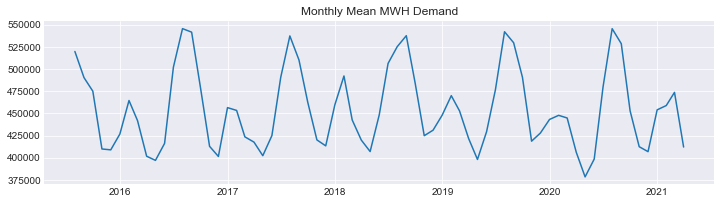

In [24]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, monthly_means, 'Monthly Mean MWH Demand')
plt.show()

In [25]:
weekly_means = mwh.resample('W').mean()

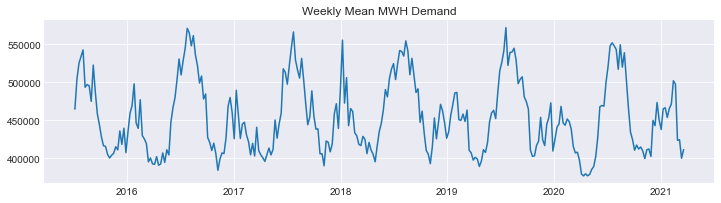

In [26]:
fig, ax = plt.subplots(figsize=(12,3))
plot_timeseries(ax, weekly_means, 'Weekly Mean MWH Demand')
plt.show()

In [27]:
daily_means = mwh.resample('D').mean()

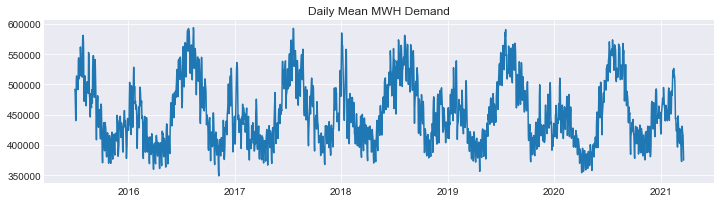

In [28]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, daily_means, 'Daily Mean MWH Demand')
plt.show()

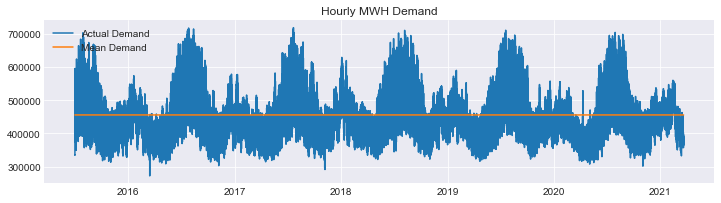

In [29]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, mwh, 'Hourly MWH Demand', 'Actual Demand')
ax.plot(mwh.index, [np.mean(mwh)]*len(mwh), label='Mean Demand')
ax.legend()
plt.show()

In [30]:
mwh_2017 = mwh.loc['2017-01-01 00:00:00':'2017-12-31 23:00:00']
mwh_2017

Time
2017-01-01 00:00:00    413734
2017-01-01 01:00:00    401305
2017-01-01 02:00:00    391149
2017-01-01 03:00:00    381509
2017-01-01 04:00:00    374644
                        ...  
2017-12-31 19:00:00    562685
2017-12-31 20:00:00    566264
2017-12-31 21:00:00    565612
2017-12-31 22:00:00    556869
2017-12-31 23:00:00    545727
Name: Megawatthours, Length: 8760, dtype: int64

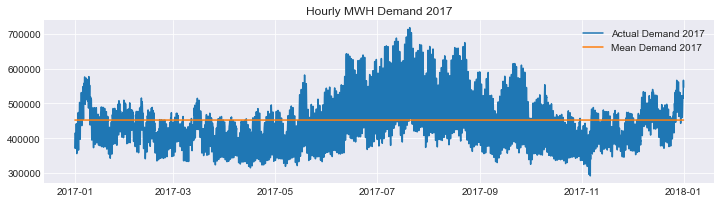

In [31]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, mwh_2017, 'Hourly MWH Demand 2017', 'Actual Demand 2017')
ax.plot(mwh_2017.index, [np.mean(mwh_2017)]*len(mwh_2017), label='Mean Demand 2017')
ax.legend()
fig.savefig('../images/eda/hourly_2017.png', dpi=400)
plt.show()

In [32]:
mwh_2017_july = mwh.loc['2017-07-01 00:00:00':'2017-07-31 23:00:00']
mwh_2017_july

Time
2017-07-01 00:00:00    514872
2017-07-01 01:00:00    482568
2017-07-01 02:00:00    453514
2017-07-01 03:00:00    429430
2017-07-01 04:00:00    411445
                        ...  
2017-07-31 19:00:00    650752
2017-07-31 20:00:00    637053
2017-07-31 21:00:00    618040
2017-07-31 22:00:00    598464
2017-07-31 23:00:00    566052
Name: Megawatthours, Length: 744, dtype: int64

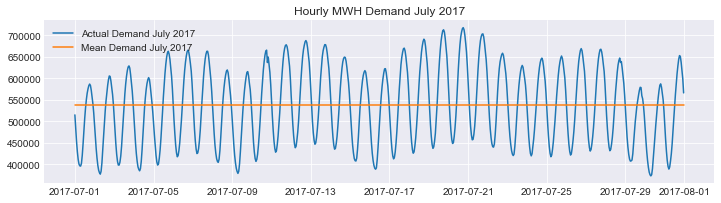

In [33]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, mwh_2017_july, 'Hourly MWH Demand July 2017', 'Actual Demand July 2017')
ax.plot(mwh_2017_july.index, [np.mean(mwh_2017_july)]*len(mwh_2017_july), label='Mean Demand July 2017')
ax.legend()
fig.savefig('../images/eda/hourly_july_2017.png', dpi=400)
plt.show()

/Users/ryanblauwaert/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


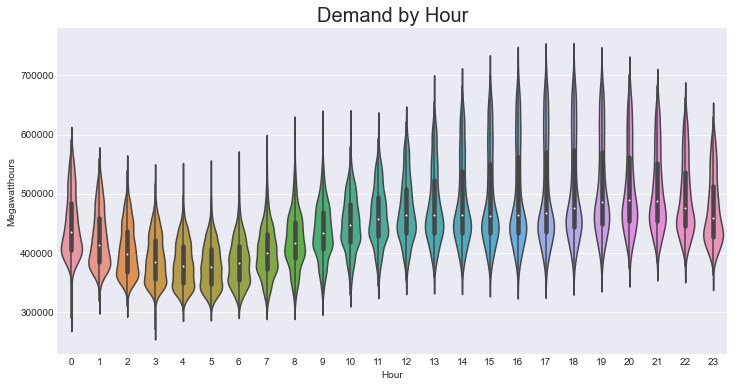

In [34]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(national_demand['Hour'], national_demand['Megawatthours'])
ax.set_title('Demand by Hour', size=20)
fig.savefig('../images/eda/hourly_agg.png', dpi=400)
plt.show()

/Users/ryanblauwaert/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


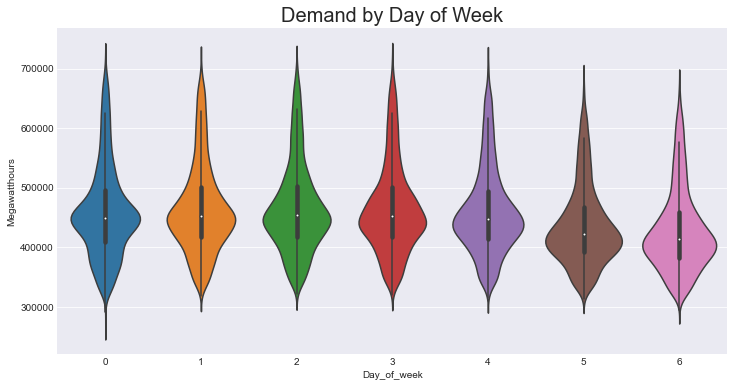

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(national_demand['Day_of_week'], national_demand['Megawatthours'])
ax.set_title('Demand by Day of Week', size=20)
fig.savefig('../images/eda/day_of_week_agg.png', dpi=400)


plt.show()

/Users/ryanblauwaert/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


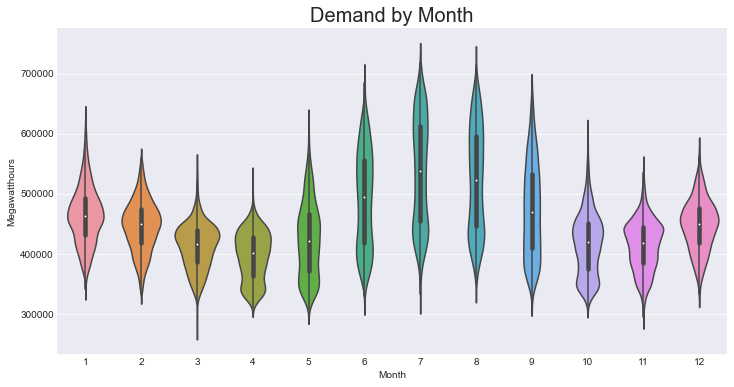

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(national_demand['Month'], national_demand['Megawatthours'])
ax.set_title('Demand by Month', size=20)
fig.savefig('../images/eda/monthly_agg.png', dpi=400)
plt.show()

## Aggregate Trends

In [37]:
national_demand.head()

,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year,Week_of_year
Time,,,,,,,,
2015-07-01 02:00:00,335153,2015,7,2,2,1,182,27
2015-07-01 03:00:00,333837,2015,7,3,2,1,182,27
2015-07-01 04:00:00,398386,2015,7,4,2,1,182,27
2015-07-01 05:00:00,388954,2015,7,5,2,1,182,27
2015-07-01 06:00:00,392487,2015,7,6,2,1,182,27


In [38]:
mw_by_hour = pd.Series(national_demand.groupby('Hour').mean('Megawatthours')['Megawatthours'])
mw_by_hour

Hour
0     448287.907656
1     424093.424618
2     405084.572182
3     390927.910091
4     382507.177427
5     379971.679579
6     386028.382592
7     402907.355811
8     421902.219512
9     437099.916786
10    450668.390722
11    462919.983262
12    472784.167862
13    480680.013869
14    487327.999522
15    492463.118125
16    496497.863223
17    501422.784792
18    507732.112386
19    511335.300335
20    510115.044955
21    505210.233971
22    493647.681340
23    473218.780861
Name: Megawatthours, dtype: float64

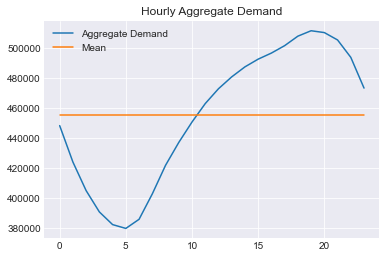

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_timeseries(ax, mw_by_hour, 'Hourly Aggregate Demand', 'Aggregate Demand')
ax.plot(mw_by_hour.index, [np.mean(mw_by_hour)]*len(mw_by_hour), label='Mean')
ax.legend()
plt.show()

In [40]:
def plot_agg_demand(ax, df, col, title=None):
    agg_dem = pd.Series(df.groupby(col).mean('Megawatthours')['Megawatthours'])
    plot_timeseries(ax, agg_dem, title, 'Aggregate Demand')
    ax.plot(agg_dem.index, [np.mean(agg_dem)]*len(agg_dem), label='Mean')

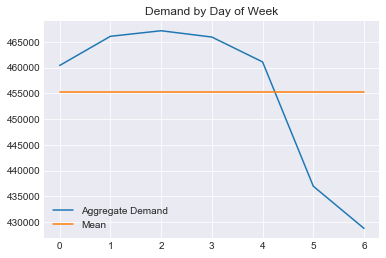

In [41]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, national_demand, 'Day_of_week', 'Demand by Day of Week')
ax.legend()
plt.show()


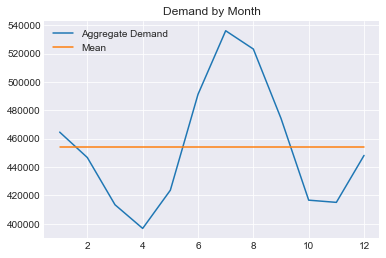

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, national_demand, 'Month', 'Demand by Month')
ax.legend()
plt.show()

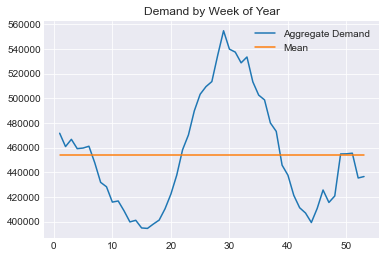

In [43]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, national_demand, 'Week_of_year', 'Demand by Week of Year')
ax.legend()
plt.show()

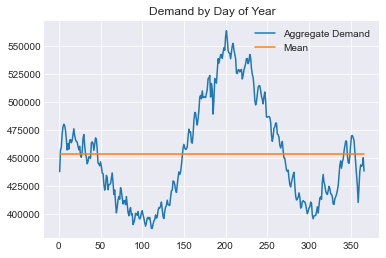

In [44]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, national_demand, 'Day_of_year', 'Demand by Day of Year')
ax.legend()
plt.show()

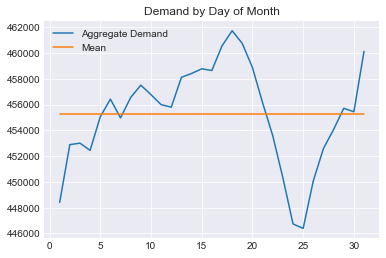

In [45]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, national_demand, 'Day_of_month', 'Demand by Day of Month')
ax.legend()
plt.show()

## Overlaying Demands

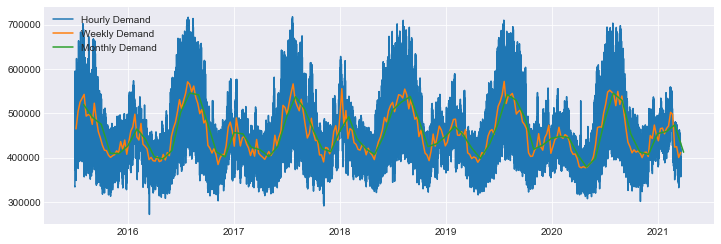

In [46]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, mwh, None, 'Hourly Demand')
plot_timeseries(ax, mwh.resample('W').mean(), None, 'Weekly Demand')
plot_timeseries(ax, mwh.resample('M').mean(), None, 'Monthly Demand')
ax.legend()
fig.savefig('../images/eda/hourly_weekly_monthly.png', dpi=400)
plt.show()

## Regression

In [47]:
def plot_regression_line(ax, feature_data, target_data, poly_order):
    ax.plot(target_data)
    model = sm.OLS(target_data, feature_data)
    model = model.fit()
    preds = model.predict(feature_data)
    ax.plot(preds)
    ax.set_title(f'Polynomial Regression of order {poly_order}')

In [48]:
mwh_time = pd.DataFrame(mwh.copy())

In [49]:
mwh_time['time'] = range(1, len(mwh_time)+1)

In [50]:
mwh_time

,Megawatthours,time
Time,,
2015-07-01 02:00:00,335153,1
2015-07-01 03:00:00,333837,2
2015-07-01 04:00:00,398386,3
2015-07-01 05:00:00,388954,4
2015-07-01 06:00:00,392487,5
...,...,...
2021-03-21 16:00:00,363364,50175
2021-03-21 17:00:00,365016,50176
2021-03-21 18:00:00,371950,50177


In [51]:
import statsmodels.api as sm
mwh_time = sm.add_constant(mwh_time)
# mwh_time['log_time'] = np.log(mwh_time['time'])
mwh_time['time^2'] = mwh_time['time']**2
mwh_time['time^3'] = mwh_time['time']**3
# mwh_time['time^4'] = mwh_time['time']**4
# mwh_time['time^5'] = mwh_time['time']**5
# mwh_time['time^6'] = mwh_time['time']**6
# mwh_time['time^7'] = mwh_time['time']**7

In [52]:
mwh_time

,const,Megawatthours,time,time^2,time^3
Time,,,,,
2015-07-01 02:00:00,1.0,335153,1,1,1
2015-07-01 03:00:00,1.0,333837,2,4,8
2015-07-01 04:00:00,1.0,398386,3,9,27
2015-07-01 05:00:00,1.0,388954,4,16,64
2015-07-01 06:00:00,1.0,392487,5,25,125
...,...,...,...,...,...
2021-03-21 16:00:00,1.0,363364,50175,2517530625,126317099109375
2021-03-21 17:00:00,1.0,365016,50176,2517630976,126324651851776
2021-03-21 18:00:00,1.0,371950,50177,2517731329,126332204895233


In [53]:
y = mwh_time.pop('Megawatthours')

In [54]:
y

Time
2015-07-01 02:00:00    335153
2015-07-01 03:00:00    333837
2015-07-01 04:00:00    398386
2015-07-01 05:00:00    388954
2015-07-01 06:00:00    392487
                        ...  
2021-03-21 16:00:00    363364
2021-03-21 17:00:00    365016
2021-03-21 18:00:00    371950
2021-03-21 19:00:00    379932
2021-03-21 20:00:00    390453
Name: Megawatthours, Length: 50179, dtype: int64

In [55]:
mwh_time

,const,time,time^2,time^3
Time,,,,
2015-07-01 02:00:00,1.0,1,1,1
2015-07-01 03:00:00,1.0,2,4,8
2015-07-01 04:00:00,1.0,3,9,27
2015-07-01 05:00:00,1.0,4,16,64
2015-07-01 06:00:00,1.0,5,25,125
...,...,...,...,...
2021-03-21 16:00:00,1.0,50175,2517530625,126317099109375
2021-03-21 17:00:00,1.0,50176,2517630976,126324651851776
2021-03-21 18:00:00,1.0,50177,2517731329,126332204895233


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, t_test = train_test_split(mwh_time, y, shuffle=False)

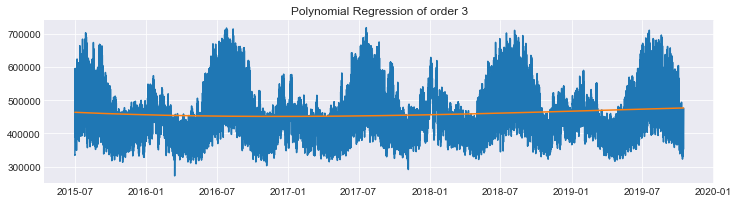

In [57]:
fig, ax = plt.subplots(figsize = (12, 3))
plot_regression_line(ax, X_train, y_train, 3)
fig.savefig('../images/eda/poly_trend.png', dpi=400)
plt.show()

In [58]:
national_demand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50179 entries, 2015-07-01 02:00:00 to 2021-03-21 20:00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Megawatthours  50179 non-null  int64 
 1   Year           50179 non-null  int64 
 2   Month          50179 non-null  int64 
 3   Hour           50179 non-null  int64 
 4   Day_of_week    50179 non-null  int64 
 5   Day_of_month   50179 non-null  int64 
 6   Day_of_year    50179 non-null  int64 
 7   Week_of_year   50179 non-null  UInt32
dtypes: UInt32(1), int64(7)
memory usage: 4.3 MB
